In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('input/flower_input.jpg', 0)

# Convolution with for loop

In [5]:
mask = np.ones((3, 3)) / 9
result = np.zeros(img.shape)

rows, cols = img.shape

start_time = time.time()
for i in range(1, rows-1):
    for j in range(1 - cols-1):
        small_img = img[i-1:i+2, j-1:j+2]
        result[i, j] = np.sum(small_img * mask)
end_time = time.time()
print(end_time - start_time)

cv2.imwrite('output/img-out.jpg', result)

0.0009992122650146484


True

# Convolution with openCV function

In [6]:
mask = np.ones((3, 3)) / 9

start_time = time.time()
result = cv2.filter2D(img, -1, mask)
end_time = time.time()
print(end_time - start_time)

cv2.imwrite('output/img-out.jpg', result)

2.157881259918213


True

# Histogram

In [7]:
hist = np.zeros((256), dtype=int)

rows, cols = img.shape
for i in range(rows):
    for j in range(cols):
        index = img[i, j]
        hist[index] += 1
print(hist)

[   60   199  1040  1012  1314  1856  5485  3779  4754  6321 14563 10533
 11635 13885 26484 16510 16760 18279 31548 19470 19001 19466 26526 19800
 19743 20116 26452 20510 20798 15247 40927 17108 25760 28107 38568 16981
 24324 14976 22445 28301 18210 10791 10388 20017 13865  8687 12661  8225
 16615  6741  5538  7849  4307  4012  7377  3315  2952  2893  4094  3873
  2267  2161  3190  1900  1825  2701  1554  1510  2241  1304  1218  1151
  1729   999   912   833   832   728   770   722  1091   627   575   567
   519   505   455   483   372   201   383   568   346   331   333   295
   161   266   275   263   273   244   132   217   229   236   215   128
   205   207   196   115   190   195   173   114   182   206   196   110
   170   155   106   139   172   159   107   154   132    84   145   136
   104   140   149   100   154   132   129   145   163   110   107   192
   159    85   144   151   146   172   159   159   155   143   171   193
   188   188   213   203   206   215   237   248   

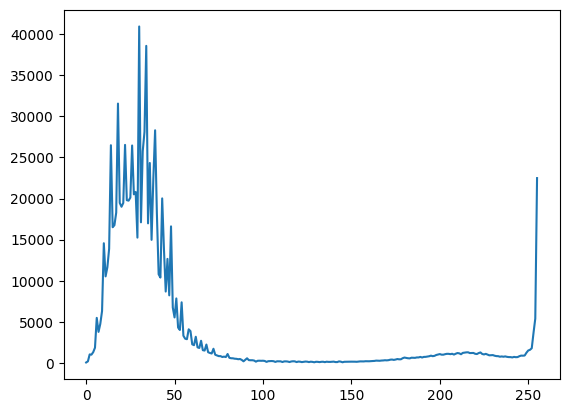

In [8]:
plt.plot(hist)

In [9]:
img1 = cv2.imread('input/1.JPG')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('input/2.JPG', 0)

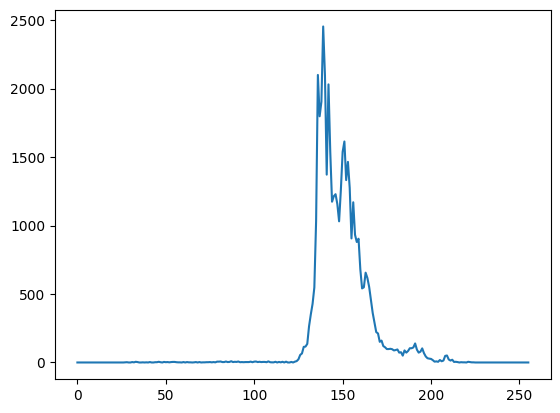

In [10]:
hist1 = np.zeros((256), dtype=int)

rows, cols = img1.shape
for i in range(rows):
    for j in range(cols):
        index = img1[i, j]
        hist1[index] += 1
plt.plot(hist1)

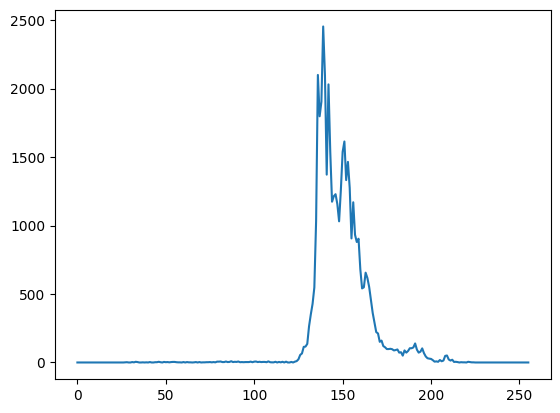

In [11]:
hist_img1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
plt.plot(hist_img1)

In [12]:
optimized_img1 = cv2.equalizeHist(img1)
hist_opt = cv2.calcHist([optimized_img1], [0], None, [256], [0, 256])

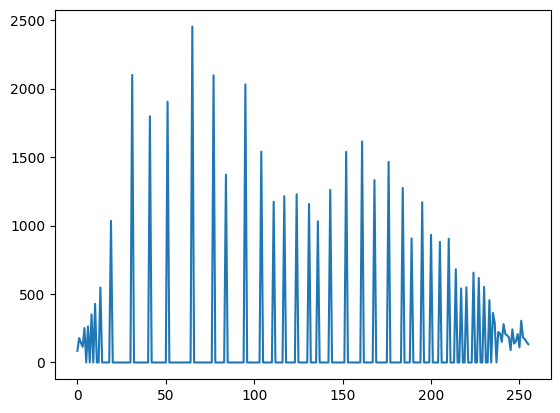

In [13]:
plt.plot(hist_opt)